In [3]:
# Importing necessary Libraries :
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter
import os
import warnings
warnings.filterwarnings('ignore')

In [175]:
import os
file_path = r'D:\Project\data\raw\tweet.csv'

try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    df = pd.read_csv(file_path,encoding='latin-1')
    print("Dataset loaded successfully.")
    print("Shape of the dataset:", df.shape)

except FileNotFoundError as fnf_error:
    print(f"{fnf_error}")
except pd.errors.EmptyDataError:
    print(" The CSV file is empty.")
except pd.errors.ParserError:
    print(" Error while parsing the CSV file.")
except Exception as e:
    print(f"Unexpected error occurred: {e}")

Dataset loaded successfully.
Shape of the dataset: (1599999, 6)


In [5]:
def clean_dataframe(df):
    df_copy=df.copy()
    df_copy=df_copy.iloc[:,[0,5]]
    df_copy.columns=['sentiment','text']
    df_copy['sentiment']=df_copy['sentiment'].map({0: 'negative', 4: 'positive'})
    return df_copy

In [6]:
#Cleaning data:
df=clean_dataframe(df)
df

,sentiment,text
0,negative,is upset that he can't update his Facebook by ...
1,negative,@Kenichan I dived many times for the ball. Man...
2,negative,my whole body feels itchy and like its on fire
3,negative,"@nationwideclass no, it's not behaving at all...."
4,negative,@Kwesidei not the whole crew
...,...,...
1599994,positive,Just woke up. Having no school is the best fee...
1599995,positive,TheWDB.com - Very cool to hear old Walt interv...
1599996,positive,Are you ready for your MoJo Makeover? Ask me f...
1599997,positive,Happy 38th Birthday to my boo of alll time!!! ...


In [7]:
#Loading neutral data from another source:
import os
file_path = r'D:\Project\data\raw\twitter_training.csv'

try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    df_train = pd.read_csv(file_path,encoding='latin-1')
    print("Dataset loaded successfully.")
    print("Shape of the dataset:", df_train.shape)

except FileNotFoundError as fnf_error:
    print(f"{fnf_error}")
except pd.errors.EmptyDataError:
    print(" The CSV file is empty.")
except pd.errors.ParserError:
    print(" Error while parsing the CSV file.")
except Exception as e:
    print(f"Unexpected error occurred: {e}")

Dataset loaded successfully.
Shape of the dataset: (74681, 4)


In [8]:
#Loading neutral data from another source:
import os
file_path = r'D:\Project\data\raw\twitter_validation.csv'

try:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"File not found: {file_path}")

    df_test = pd.read_csv(file_path,encoding='latin-1')
    print("Dataset loaded successfully.")
    print("Shape of the dataset:", df_test.shape)

except FileNotFoundError as fnf_error:
    print(f"{fnf_error}")
except pd.errors.EmptyDataError:
    print(" The CSV file is empty.")
except pd.errors.ParserError:
    print(" Error while parsing the CSV file.")
except Exception as e:
    print(f"Unexpected error occurred: {e}")

Dataset loaded successfully.
Shape of the dataset: (999, 4)


In [9]:
train_data=df_train.iloc[:,2:]
train_neutral_data=train_data.loc[(train_data['Positive']=='Neutral')].reset_index(drop=True)

In [10]:
test_data=df_test.iloc[:,2:]
test_neutral_data=test_data.loc[(test_data['Irrelevant']=='Neutral')].reset_index(drop=True)

In [11]:
neutral_data = pd.concat([train_neutral_data, test_neutral_data], axis=0).reset_index(drop=True)

In [12]:
neutral_data_new=neutral_data.iloc[:,:2]

In [13]:
neutral_data_new.drop_duplicates(inplace=True)

In [14]:
neutral_data_new.dropna(inplace=True)

In [15]:
neutral_data_new.isnull().sum()

Positive                                                 0
im getting on borderlands and i will murder you all ,    0
dtype: int64

In [16]:
neutral_data_new.to_csv(r'D:\Project\data\raw\neutral_data.csv',index=False)

In [17]:
neutral_data_new.columns=['sentiment','text']

In [18]:
df

,sentiment,text
0,negative,is upset that he can't update his Facebook by ...
1,negative,@Kenichan I dived many times for the ball. Man...
2,negative,my whole body feels itchy and like its on fire
3,negative,"@nationwideclass no, it's not behaving at all...."
4,negative,@Kwesidei not the whole crew
...,...,...
1599994,positive,Just woke up. Having no school is the best fee...
1599995,positive,TheWDB.com - Very cool to hear old Walt interv...
1599996,positive,Are you ready for your MoJo Makeover? Ask me f...
1599997,positive,Happy 38th Birthday to my boo of alll time!!! ...


In [19]:
sentiment_df=pd.concat([df,neutral_data_new],axis=0).reset_index(drop=True)

In [20]:
sentiment_df['sentiment'].value_counts()

sentiment
positive    800000
negative    799999
Neutral      17110
Name: count, dtype: int64

In [21]:
df=sentiment_df
print(f"Total tweets: {len(df)}")
print(df['sentiment'].value_counts(normalize=True))

Total tweets: 1617109
sentiment
positive    0.494710
negative    0.494709
Neutral     0.010581
Name: proportion, dtype: float64


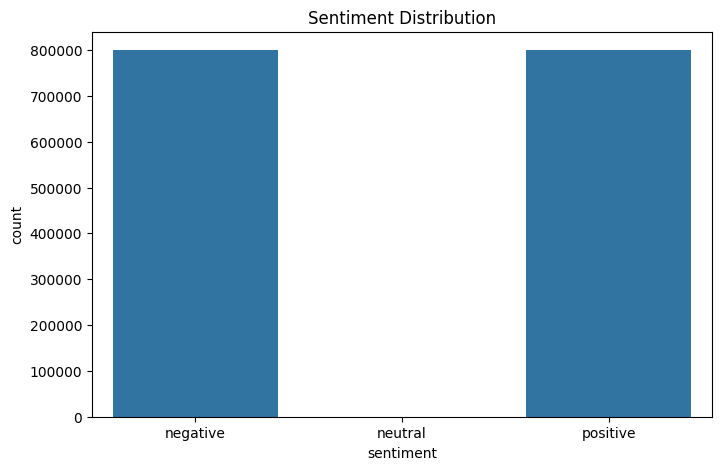

In [ ]:
#Sentiment Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='sentiment', order=['negative', 'neutral', 'positive'])
plt.title('Sentiment Distribution')
plt.show()

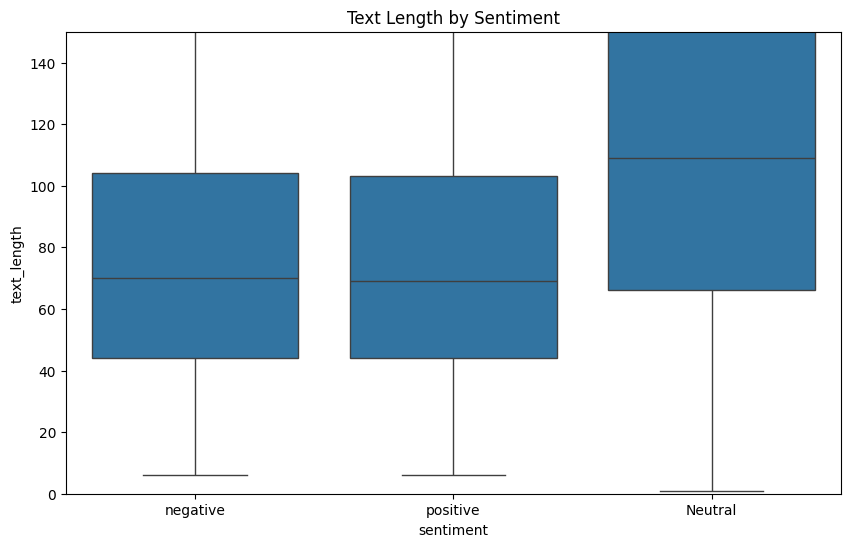

In [ ]:

# Text Length Analysis
df['text_length'] = df['text'].apply(len)
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='sentiment', y='text_length')
plt.ylim(0, 150)  # Trim outliers
plt.title('Text Length by Sentiment')
plt.show()

In [24]:
df['sentiment'].replace({'Neutral':'neutral'},inplace=True)

In [25]:
df

,sentiment,text,text_length
0,negative,is upset that he can't update his Facebook by ...,111
1,negative,@Kenichan I dived many times for the ball. Man...,89
2,negative,my whole body feels itchy and like its on fire,47
3,negative,"@nationwideclass no, it's not behaving at all....",111
4,negative,@Kwesidei not the whole crew,29
...,...,...,...
1617104,neutral,"Nvidia plans to release its 2017 ""Crypto Craze...",89
1617105,neutral,"Nvidia does not want to give up its ""cryptoins...",83
1617106,neutral,Nvidia doesnât intend to give away its 2017 ...,91
1617107,neutral,Nvidia therefore doesn â t want to give up i...,133


In [ ]:
# Word Frequency Analysis
def get_top_words(text_series, n=20):
    all_words = ' '.join(text_series).split()
    return Counter(all_words).most_common(n)

# Top words by sentiment
for sentiment in ['positive', 'neutral', 'negative']:
    top_words = get_top_words(df[df['sentiment']==sentiment]['text'])
    print(f"\nTop {sentiment} words:")
    print(top_words)


Top positive words:
[('the', 246501), ('to', 246444), ('I', 196797), ('a', 190388), ('you', 138383), ('and', 135023), ('for', 113503), ('my', 113108), ('is', 99567), ('in', 93873), ('i', 89884), ('of', 88640), ('it', 80725), ('on', 76800), ('with', 62629), ('that', 56777), ('have', 54373), ('me', 53162), ('so', 52417), ('be', 51431)]

Top neutral words:
[('the', 8280), ('/', 7438), ('to', 6482), ('and', 5741), ('a', 5109), ('I', 4629), ('of', 4474), ('for', 3696), ('in', 3529), ('.', 3507), ('is', 2937), ('on', 2865), ('@', 2348), ('-', 2291), ('this', 2083), ('my', 2030), ('with', 2021), ('it', 1966), ('you', 1846), ('that', 1741)]

Top negative words:
[('to', 306517), ('I', 299822), ('the', 241000), ('a', 175823), ('my', 166917), ('i', 160132), ('and', 140240), ('is', 118126), ('in', 108421), ('for', 96298), ('it', 91087), ('of', 90913), ('have', 77876), ('on', 77565), ('you', 75488), ('so', 72738), ('me', 69347), ('but', 68267), ('that', 61908), ('not', 61387)]


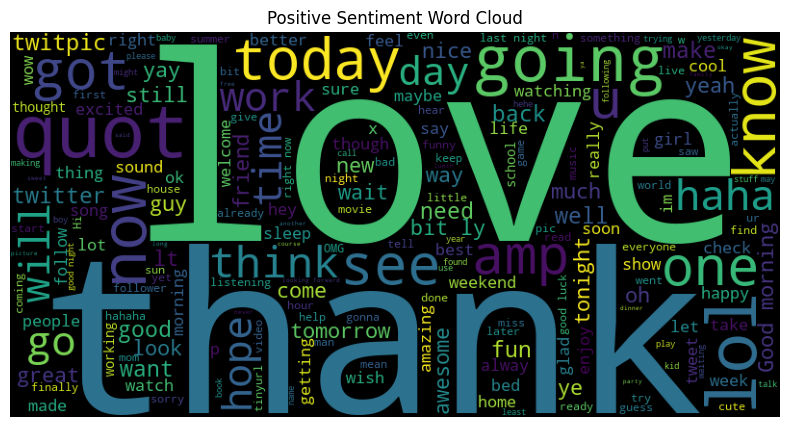

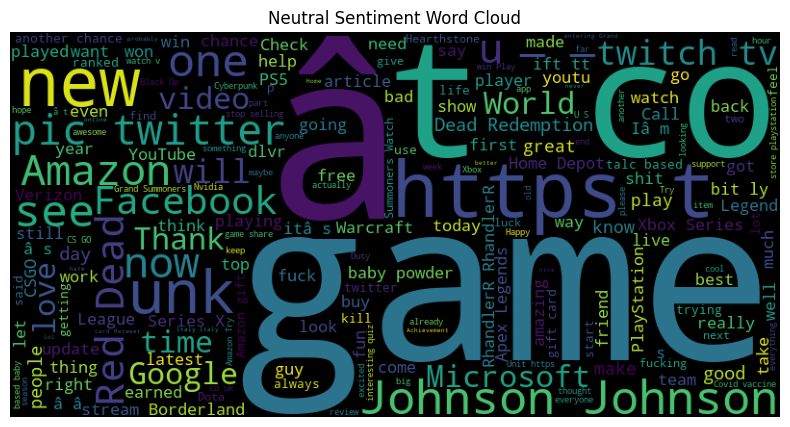

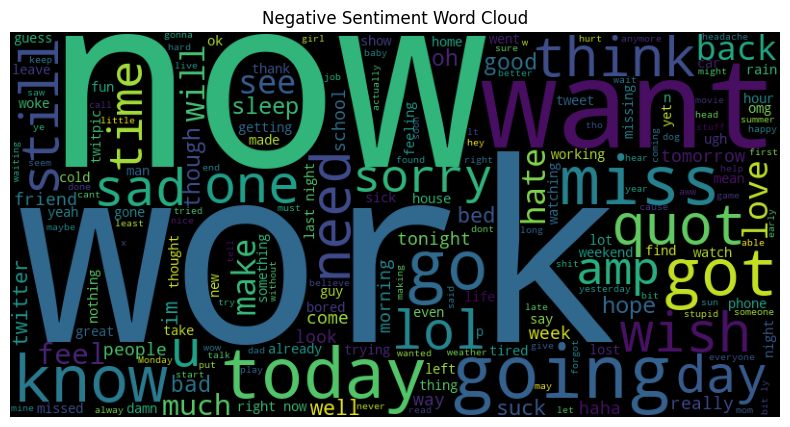

In [ ]:
# Word Clouds
for sentiment in ['positive', 'neutral', 'negative']:
    text = ' '.join(df[df['sentiment']==sentiment]['text'])
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10,5))
    plt.imshow(wordcloud)
    plt.title(f'{sentiment.capitalize()} Sentiment Word Cloud')
    plt.axis('off')
    plt.show()

In [28]:
df['sentiment'].value_counts().to_string

<bound method Series.to_string of sentiment
positive    800000
negative    799999
neutral      17110
Name: count, dtype: int64>

In [ ]:
df_positive_down = df[df['sentiment'] == 'positive'].sample(n=20000, random_state=42)
df_negative_down = df[df['sentiment'] == 'negative'].sample(n=20000, random_state=42)
df_neutral = df[df['sentiment'] == 'neutral'] 
df_balanced = pd.concat([df_positive_down, df_negative_down, df_neutral]).sample(frac=1, random_state=42).reset_index(drop=True)
print(df_balanced['sentiment'].value_counts())


sentiment
positive    20000
negative    20000
neutral     17110
Name: count, dtype: int64


In [30]:
df_balanced.isnull().sum()

sentiment      0
text           0
text_length    0
dtype: int64

In [31]:
df_balanced

,sentiment,text,text_length
0,positive,lol okiess but i'll show you guys it first ho...,125
1,neutral,"25 speakers, only 1 woman. This is their",40
2,negative,Just witnessed the best mullet in years. Misse...,61
3,positive,Enjoyed reminiscing at Jill's party last night,47
4,negative,I'm back from a long day at work. My knees are...,94
...,...,...,...
57105,neutral,Global Trends in Multiple Myeloma Drugs Market...,143
57106,negative,"i wanna my laptop comeback to me, my sist I hu...",64
57107,positive,@MelodyLeaLamb Goooood Morning Melody! Wishing...,94
57108,positive,sitting out back at the parents house. the cou...,69


In [32]:
df_balanced.to_csv(r'D:\Project\data\processed\balanced_data.csv',index=False)

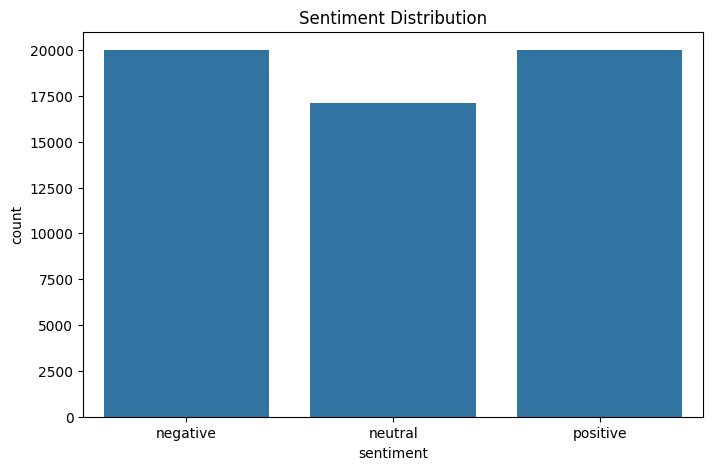

In [33]:
# Sentiment Distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df_balanced, x='sentiment', order=['negative', 'neutral', 'positive'])
plt.title('Sentiment Distribution')
plt.show()

In [34]:
df=df_balanced

In [35]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [71]:
from nltk.tokenize import word_tokenize
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prabh\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [72]:
def preprocess(text):
    text = text.lower()
    text = ''.join([ch for ch in text if ch not in string.punctuation])
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

df['clean_text'] = df['text'].apply(preprocess)

In [164]:
df.isnull().sum()

sentiment      0
text           0
text_length    0
clean_text     0
dtype: int64

In [165]:
df[df['sentiment']==''].to_string

<bound method DataFrame.to_string of Empty DataFrame
Columns: [sentiment, text, text_length, clean_text]
Index: []>

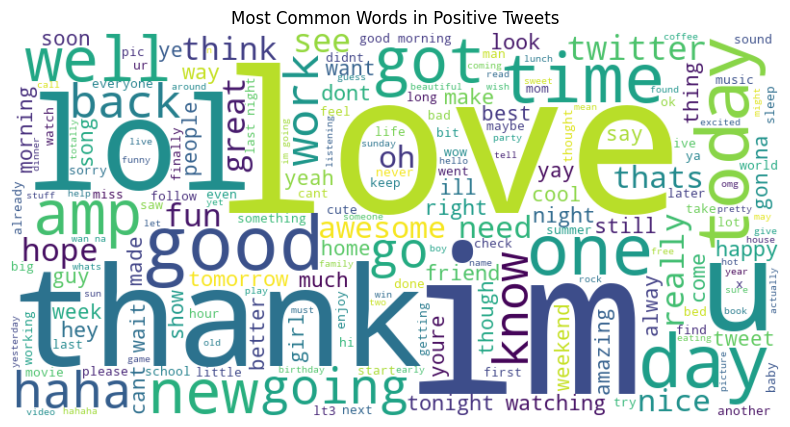

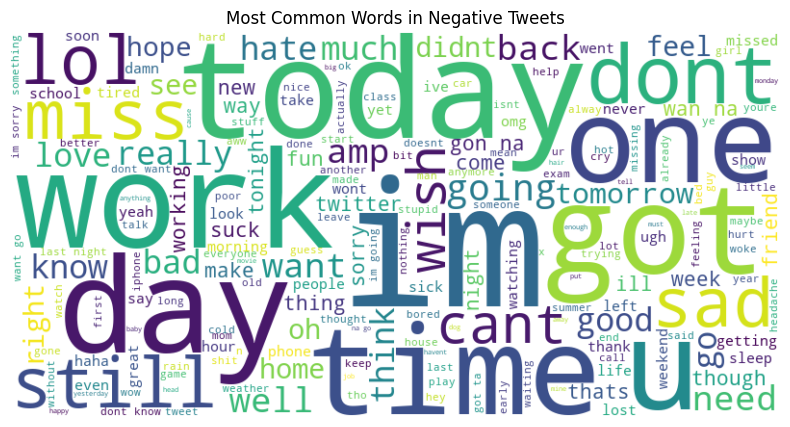

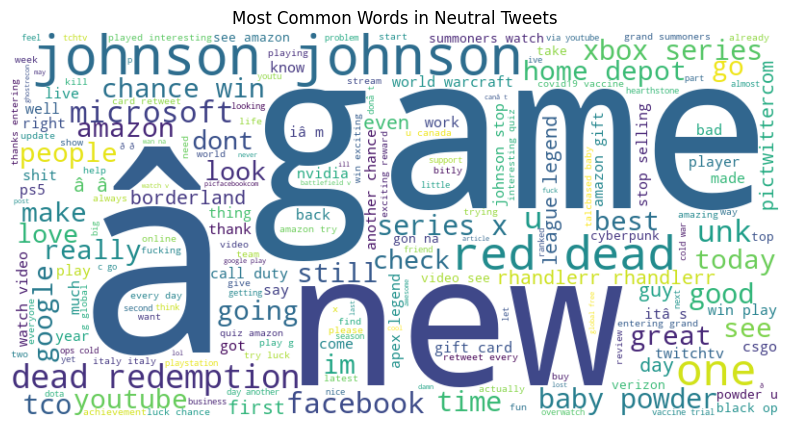

In [73]:
from wordcloud import WordCloud

def generate_wordcloud(df, sentiment_label):
    text = " ".join(df[df['sentiment'] == sentiment_label]['clean_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Most Common Words in {sentiment_label.capitalize()} Tweets")
    plt.show()

# Generate for each sentiment
generate_wordcloud(df, 'positive')
generate_wordcloud(df, 'negative')
generate_wordcloud(df, 'neutral')


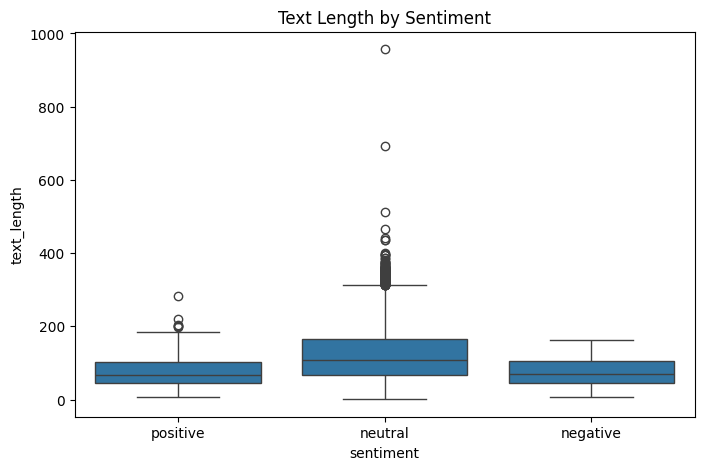

In [74]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sentiment', y='text_length')
plt.title("Text Length by Sentiment")
plt.show()


In [75]:
df

,sentiment,text,text_length,clean_text
0,positive,lol okiess but i'll show you guys it first ho...,125,lol okiess ill show guy first send shall take ...
1,neutral,"25 speakers, only 1 woman. This is their",40,25 speaker 1 woman
2,negative,Just witnessed the best mullet in years. Misse...,61,witnessed best mullet year missed photo op
3,positive,Enjoyed reminiscing at Jill's party last night,47,enjoyed reminiscing jills party last night
4,negative,I'm back from a long day at work. My knees are...,94,im back long day work knee fcking killing dont...
...,...,...,...,...
57105,neutral,Global Trends in Multiple Myeloma Drugs Market...,143,global trend multiple myeloma drug market driv...
57106,negative,"i wanna my laptop comeback to me, my sist I hu...",64,wan na laptop comeback sist huh need
57107,positive,@MelodyLeaLamb Goooood Morning Melody! Wishing...,94,melodylealamb goooood morning melody wishing w...
57108,positive,sitting out back at the parents house. the cou...,69,sitting back parent house country nice sometimes


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500,ngram_range=(1,3))
X = vectorizer.fit_transform(df['clean_text'])
y = df['sentiment'].map({'positive': 2,'neutral':1,'negative':0})


In [185]:
X.toarray().shape

(57110, 500)

In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [85]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [86]:
y_pred=model.predict(X_test)

In [87]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,roc_auc_score

In [88]:
confusion_matrix(y_pred,y_test)

array([[2675,  274,  952],
       [ 177, 2539,  229],
       [1201,  627, 2748]])

In [89]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.69      0.67      3901
           1       0.74      0.86      0.80      2945
           2       0.70      0.60      0.65      4576

    accuracy                           0.70     11422
   macro avg       0.70      0.72      0.70     11422
weighted avg       0.70      0.70      0.69     11422



In [ ]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

models = {
    "LogisticRegression": LogisticRegression(max_iter=200,multi_class='ovr',n_jobs=-1),
    "RidgeClassifier": RidgeClassifier(),
    "SVM": SVC(probability=True),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(n_jobs=-1),
    "GradientBoosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss',n_jobs=-1),
    "LightGBM": LGBMClassifier(n_jobs=-1)
}

In [156]:
max(results,key=lambda x:x['Test Accuracy'])

{'Model': 'SVM',
 'Train Accuracy': 0.8372658028366311,
 'Train F1': 0.8391323877788607,
 'Test Accuracy': 0.7214148135177727,
 'Test F1': 0.7255843769987309,
 'ROC AUC': 0.8687290802062586}

In [172]:
def get_best_model(result):
    best_model=max(result,key=lambda x:x['Test F1'])
    return best_model 

x=get_best_model(results)
x

{'Model': 'SVM',
 'Train Accuracy': 0.8372658028366311,
 'Train F1': 0.8391323877788607,
 'Test Accuracy': 0.7214148135177727,
 'Test F1': 0.7255843769987309,
 'ROC AUC': 0.8687290802062586}

In [174]:
results[results.index(x)]

{'Model': 'SVM',
 'Train Accuracy': 0.8372658028366311,
 'Train F1': 0.8391323877788607,
 'Test Accuracy': 0.7214148135177727,
 'Test F1': 0.7255843769987309,
 'ROC AUC': 0.8687290802062586}

In [173]:
results.index(x)

2

Model training::   0%|          | 0/9 [00:00<?, ?it/s]


 Training LogisticRegression...


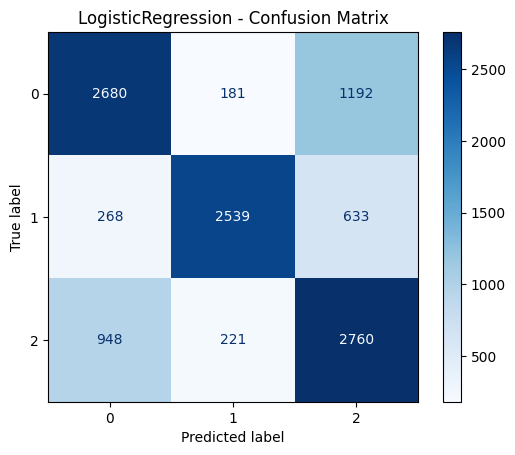

Model training::  11%|█         | 1/9 [00:05<00:47,  5.92s/it]


 Training RidgeClassifier...
ROC AUC not computed for RidgeClassifier: 'RidgeClassifier' object has no attribute 'predict_proba'


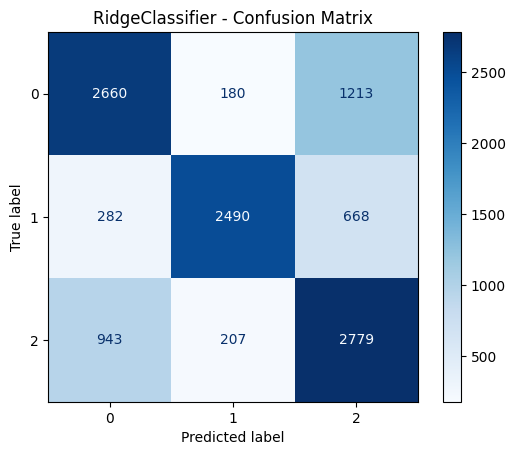

Model training::  22%|██▏       | 2/9 [00:06<00:19,  2.81s/it]


 Training SVM...


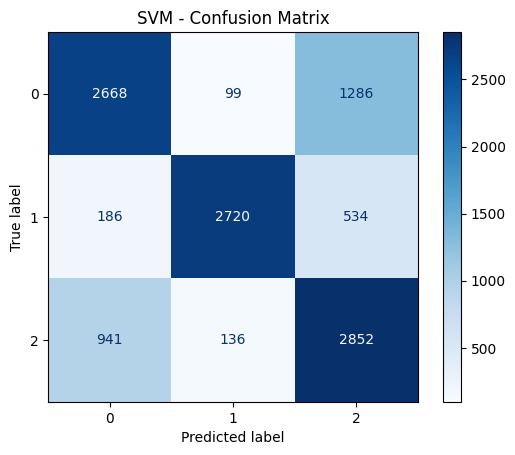

Model training::  33%|███▎      | 3/9 [36:32<1:39:57, 999.53s/it]


 Training DecisionTree...


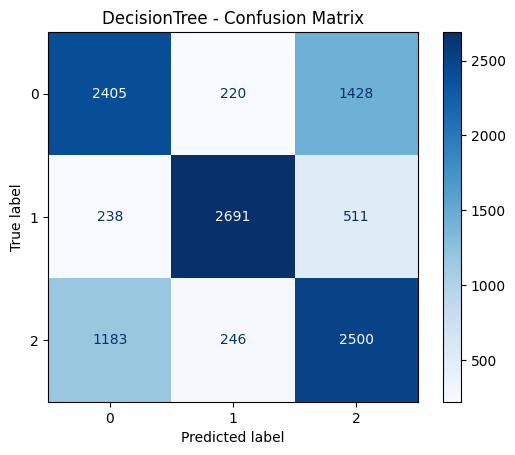

Model training::  44%|████▍     | 4/9 [36:52<51:04, 612.92s/it]  


 Training RandomForest...


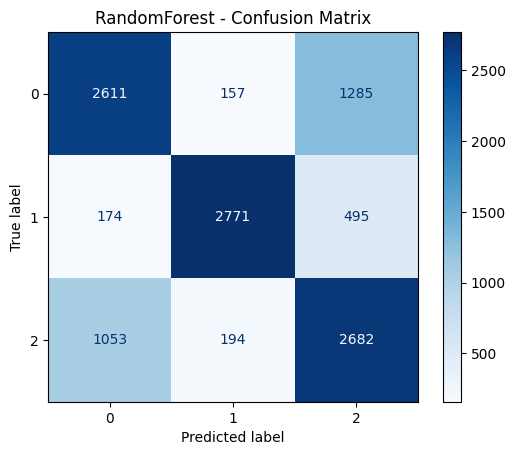

Model training::  56%|█████▌    | 5/9 [37:33<27:06, 406.57s/it]


 Training GradientBoosting...


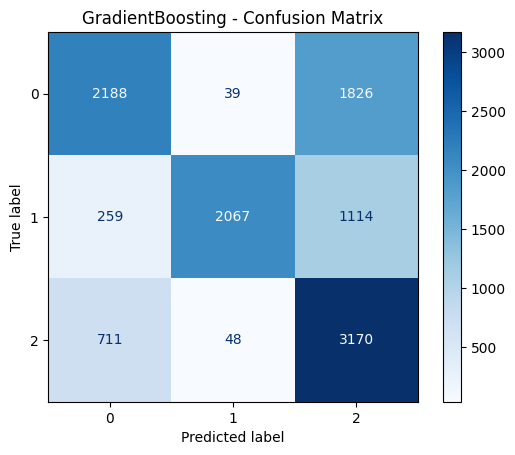

Model training::  67%|██████▋   | 6/9 [39:12<15:06, 302.14s/it]


 Training AdaBoost...


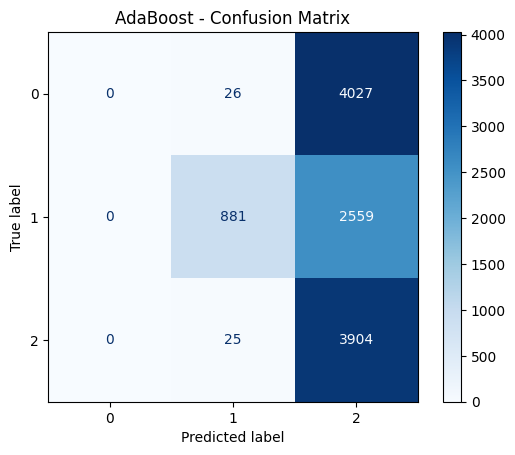

Model training::  78%|███████▊  | 7/9 [39:17<06:49, 204.88s/it]


 Training XGBoost...


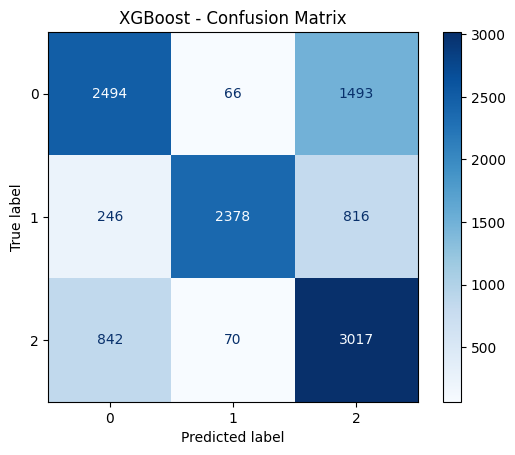

Model training::  89%|████████▉ | 8/9 [39:24<02:22, 142.08s/it]


 Training LightGBM...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.037433 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54893
[LightGBM] [Info] Number of data points in the train set: 45688, number of used features: 500
[LightGBM] [Info] Start training from score -1.052565
[LightGBM] [Info] Start training from score -1.206632
[LightGBM] [Info] Start training from score -1.044819


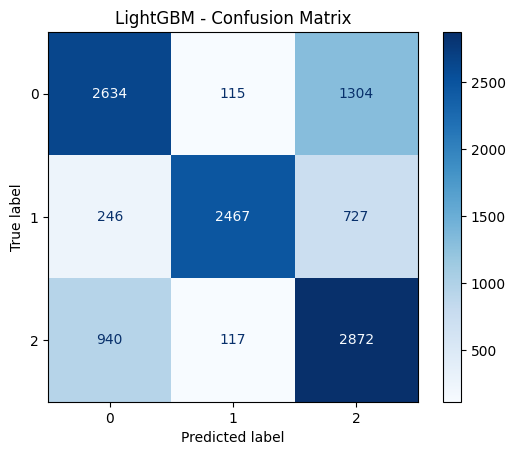

Model training:: 100%|██████████| 9/9 [39:28<00:00, 263.14s/it]


Model Comparison (sorted by Test Accuracy):


,Model,Train Accuracy,Train F1,Test Accuracy,Test F1,ROC AUC
2,SVM,0.837266,0.839132,0.721415,0.725584,0.868729
4,RandomForest,0.914310,0.914891,0.706006,0.709076,0.869714
0,LogisticRegression,0.709508,0.712505,0.698564,0.701964,0.866724
8,LightGBM,0.729885,0.733845,0.698039,0.703205,0.871751
1,RidgeClassifier,0.706794,0.710112,0.694187,0.697837,NaN
7,XGBoost,0.737371,0.741535,0.690685,0.696664,0.868784
3,DecisionTree,0.914332,0.914871,0.665032,0.667866,0.769828
5,GradientBoosting,0.663456,0.667471,0.650061,0.655144,0.835692
6,AdaBoost,0.427465,0.316596,0.418928,0.307649,0.608010



Best model 'SVC' saved as 'best_sentiment_model.pkl'


In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
)
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
import numpy as np

results = []
best_model = None
best_score = 0

for name, model in tqdm.tqdm(models.items(), desc='Model training:'):
    print(f"\n Training {name}...")
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    train_acc = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train, average='weighted')
    y_pred_test = model.predict(X_test)
    test_acc = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average='weighted')
    try:
        y_proba = model.predict_proba(X_test)
        roc_auc = roc_auc_score(
            y_test, y_proba, multi_class='ovr', average='weighted'
        )
    except Exception as e:
        roc_auc = np.nan
        print(f"ROC AUC not computed for {name}: {e}")
    try:
        cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
        disp.plot(cmap='Blues')
        plt.title(f"{name} - Confusion Matrix")
        plt.show()
    except:
        print(f"Confusion matrix failed for {name}")

    if test_acc > best_score:
        best_score = test_acc
        best_model = model

    results.append({
        'Model': name,
        'Train Accuracy': train_acc,
        'Train F1': train_f1,
        'Test Accuracy': test_acc,
        'Test F1': test_f1,
        'ROC AUC': roc_auc
    })

results_df = pd.DataFrame(results)
print("\nModel Comparison (sorted by Test Accuracy):")
display(results_df.sort_values(by='Test Accuracy', ascending=False))

import joblib
joblib.dump(best_model, 'best_sentiment_model.pkl')
print(f"\nBest model '{best_model.__class__.__name__}' saved as 'best_sentiment_model.pkl'")


In [105]:
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [102]:
SOTA_model=joblib.load(r'D:\Project\notebooks\best_sentiment_model.pkl')

In [103]:
new_texts = [
    "I love this product! It works amazingly well.",
    "Terrible service. Will never come back.",
    "The experience was okay, nothing special.",
    "Worst ever. I'm disappointed.",
    "Highly recommend it to anyone!"
]
new_cleaned = [preprocess(text) for text in new_texts]
X_new = vectorizer.transform(new_cleaned)
y_pred = SOTA_model.predict(X_new)


In [107]:
label_map = {2: 'positive', 1: 'neutral', 0: 'negative'}
pred_labels = [label_map[pred] for pred in y_pred]

for text, label in zip(new_texts, pred_labels):
    print(f"Text:{text}\nPredicted Sentiment:{label}\n")


Text:I love this product! It works amazingly well.
Predicted Sentiment:positive

Text:Terrible service. Will never come back.
Predicted Sentiment:negative

Text:The experience was okay, nothing special.
Predicted Sentiment:negative

Text:Worst ever. I'm disappointed.
Predicted Sentiment:positive

Text:Highly recommend it to anyone!
Predicted Sentiment:positive



In [ ]:
from sklearn.model_selection import GridSearchCV

In [94]:
from sklearn.linear_model import LogisticRegression

params = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear', 'lbfgs']
}

grid_lr = GridSearchCV(LogisticRegression(max_iter=200), param_grid=params, cv=3, scoring='roc_auc_ovr_weighted',n_jobs=-1)
grid_lr.fit(X_train, y_train)

print("Best Logistic Regression Params:", grid_lr.best_params_)
print("Best ROC AUC:", grid_lr.best_score_)


Best Logistic Regression Params: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Best ROC AUC: 0.8641277721896601


In [95]:
from sklearn.ensemble import RandomForestClassifier

params = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5]
}

grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=params, cv=3, scoring='roc_auc_ovr_weighted',n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Best Random Forest Params:", grid_rf.best_params_)
print("Best ROC AUC:", grid_rf.best_score_)


Best Random Forest Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Best ROC AUC: 0.8650843938423337


In [96]:
from xgboost import XGBClassifier

params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 6, 10]
}

grid_xgb = GridSearchCV(
    XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    param_grid=params,
    cv=3,
    scoring='roc_auc_ovr_weighted',
    n_jobs=-1
)
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Params:", grid_xgb.best_params_)
print("Best ROC AUC:", grid_xgb.best_score_)


Best XGBoost Params: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 200}
Best ROC AUC: 0.8683524090708894


In [97]:
from lightgbm import LGBMClassifier

params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'num_leaves': [31, 63],
    'max_depth': [-1, 10, 20]
}

grid_lgbm = GridSearchCV(
    LGBMClassifier(),
    param_grid=params,
    cv=3,
    scoring='roc_auc_ovr_weighted',
    n_jobs=-1
)
grid_lgbm.fit(X_train, y_train)

print("Best LightGBM Params:", grid_lgbm.best_params_)
print("Best ROC AUC:", grid_lgbm.best_score_)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.054009 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 54893
[LightGBM] [Info] Number of data points in the train set: 45688, number of used features: 500
[LightGBM] [Info] Start training from score -1.052565
[LightGBM] [Info] Start training from score -1.206632
[LightGBM] [Info] Start training from score -1.044819
Best LightGBM Params: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 100, 'num_leaves': 63}
Best ROC AUC: 0.867705236665013


In [ ]:
best_model = grid_xgb.best_estimator_

y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("ROC AUC:", roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted'))

Accuracy: 0.6469094729469445
F1 Score: 0.6521807817456685
ROC AUC: 0.8326080072228148


In [98]:
from sklearn.linear_model import LogisticRegression
model_tunned_lr = LogisticRegression(max_iter=200,C=10,penalty='l2',solver='liblinear')
model_tunned_lr.fit(X_train, y_train)
y_pred=model_tunned_lr.predict(X_test)

confusion_matrix(y_pred,y_test)

# C': 10, 'penalty': 'l2', 'solver': 'liblinear'

array([[2681,  276,  965],
       [ 170, 2533,  212],
       [1202,  631, 2752]])

In [ ]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.66      0.68      0.67      3922
           1       0.74      0.87      0.80      2915
           2       0.70      0.60      0.65      4585

    accuracy                           0.70     11422
   macro avg       0.70      0.72      0.71     11422
weighted avg       0.70      0.70      0.69     11422



In [ ]:
import string
print(list(string.punctuation))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [141]:
os.path.abspath(os.getcwd())

'd:\\Project\\notebooks'

In [140]:
os.path.abspath(os.path.join(os.getcwd(), '..'))

'd:\\Project'

In [ ]:
import sys
import os
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.append(project_root)


In [180]:
from src.utils.load_data import DataLoader
loader=DataLoader()
df=loader.load_dataset(r'D:\Project\data\results\results_df.csv')
df

CSV Dataset Loaded Successfully!
 Dataset Shape: 10 rows and 6 columns.


,Model,train_accuracy,train_f1,test_accuracy,test_f1,ROC
0,SVM,0.931866,0.932079,0.795154,0.796111,0.918507
1,LogisticRegression,0.808331,0.808672,0.768370,0.769011,0.906339
2,RidgeClassifier,0.818002,0.818142,0.764405,0.764890,NaN
3,RandomForest,0.984162,0.984183,0.760352,0.760824,0.898092
4,naive_bayes,0.779188,0.780347,0.746256,0.747664,0.896497
5,LightGBM,0.776346,0.779070,0.743260,0.746601,0.893914
6,XGBoost,0.764120,0.768021,0.720705,0.725145,0.882373
7,DecisionTree,0.984162,0.984183,0.704758,0.705063,0.781064
8,GradientBoosting,0.670015,0.674910,0.654185,0.658917,0.832482
9,AdaBoost,0.427064,0.319956,0.426872,0.318900,0.594873


In [193]:
results_df=loader.load_dataset(r'D:\Project\data\results\results_df.csv')

CSV Dataset Loaded Successfully!
 Dataset Shape: 10 rows and 6 columns.


In [194]:
results_df

,Model,train_accuracy,train_f1,test_accuracy,test_f1,ROC
0,SVM,0.931866,0.932079,0.795154,0.796111,0.918507
1,LogisticRegression,0.808331,0.808672,0.768370,0.769011,0.906339
2,RidgeClassifier,0.818002,0.818142,0.764405,0.764890,NaN
3,RandomForest,0.984162,0.984183,0.760352,0.760824,0.898092
4,naive_bayes,0.779188,0.780347,0.746256,0.747664,0.896497
5,LightGBM,0.776346,0.779070,0.743260,0.746601,0.893914
6,XGBoost,0.764120,0.768021,0.720705,0.725145,0.882373
7,DecisionTree,0.984162,0.984183,0.704758,0.705063,0.781064
8,GradientBoosting,0.670015,0.674910,0.654185,0.658917,0.832482
9,AdaBoost,0.427064,0.319956,0.426872,0.318900,0.594873
